# Topic 5: Unsupervised Learning | Factor Analysis
In this notebook we do the exact same as in `factoranalysis.ipnby`. However we calculate the `EM` (Learning) step by "hand".  

X correlation: [[0.9937007  0.54503029 0.41235573 0.37720246 0.53790459]
 [0.54503029 0.99223287 0.468404   0.42947756 0.60225594]
 [0.41235573 0.468404   0.99090409 0.59874622 0.69593761]
 [0.37720246 0.42947756 0.59874622 0.9920845  0.64981727]
 [0.53790459 0.60225594 0.69593761 0.64981727 0.98795238]]
Communalities: [0.50034473 0.59494772 0.63753133 0.56275444 0.79266892]
Uniquenesses: [0.49335597 0.39728515 0.35337276 0.42933006 0.19528346]
Variance explained by factors: [0.15410138 0.46354805]


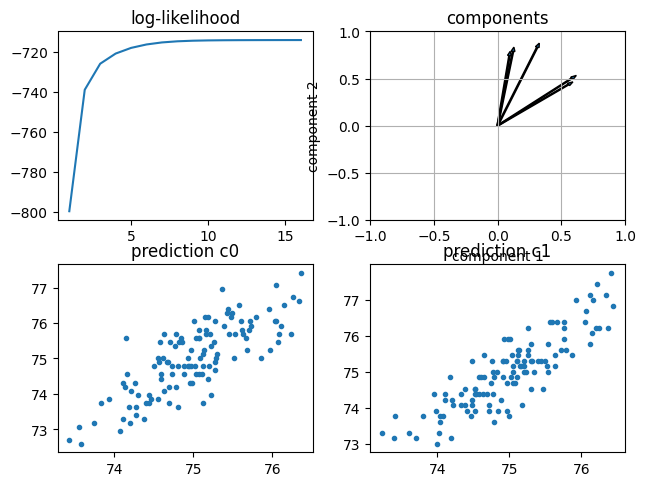

In [2]:

import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal

def biplot(coeff,ax):
    for i in range(coeff.shape[1]):
        ax.arrow(0, 0, coeff[0,i], coeff[1,i], width=.01)
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_xlabel("component 1")
    ax.set_ylabel("component 2")
    ax.grid()

df = pd.read_csv("examgrades.csv")
X = df.to_numpy()

# preprocessing
mu = np.mean(X,0)
std = np.std(X,0)
X = (X-mu)/std

k = 2
tol = 1e-5

# MANUAL

def get_llh(X,Lambda,Psi):
    Sigma = np.matmul(Lambda.T,Lambda) + Psi
    mu = np.zeros(np.shape(X)[1])
    return np.sum(multivariate_normal.logpdf(X,mu,Sigma))


def expectation(X,Lambda,Psi):
    invPsi =np.linalg.inv(Psi)
    A = np.matmul(Lambda,np.matmul(invPsi,Lambda.T))
    G = np.linalg.inv(np.eye(k)+A)
    g = np.matmul(G,np.matmul(Lambda,np.matmul(invPsi,X.T)))  ## could be G.T instead of G
    # print(np.shape(G),np.shape(Lambda),np.shape(invPsi),np.shape(X.T),'->',np.shape(g))
    return g,G

def maximization(X,g,G):
    N = np.shape(X)[0]
    invgsq = np.linalg.inv(np.matmul(g,g.T) + N*G)
    Lambda = np.matmul(X.T,np.matmul(g.T,invgsq)).T
    A = np.matmul(Lambda.T,np.matmul(G,Lambda))
    B = X-np.matmul(Lambda.T,g).T
    Psi = np.matmul(B.T,B)/N + A
    Psi = np.diag(np.diag(Psi))
    return Lambda,Psi


Lambda = np.random.normal(size=(k,np.shape(X)[1]))
Psi = np.eye(np.shape(X)[1])

# iteration
llh = [-np.inf]
for i in range(500):
    g,G = expectation(X,Lambda,Psi)
    Lambda,Psi = maximization(X,g,G)
    llh.append(get_llh(X,Lambda,Psi))
    if abs(llh[i]-llh[i+1]) < tol*abs(llh[i+1]):
        break

g = g.T

xpred = np.matmul(g,Lambda)

xCorr = np.matmul(Lambda.T,Lambda)+Psi
print("X correlation:",xCorr)

comm = np.sum(Lambda**2,0)
print("Communalities:",comm)

uniq = np.diag(Psi)
print("Uniquenesses:",uniq)

varExpl = np.sum(Lambda**2,1)/np.shape(X)[1]
print("Variance explained by factors:",varExpl)



fig, ax = plt.subplots(2,2)
fig.tight_layout()
ax[0,0].set_title('log-likelihood')
ax[0,0].plot(range(len(llh)),llh)
for i in range(2):
    ax[1,i].set_title('prediction c{}'.format(i))
    ax[1,i].scatter(xpred[:,i] + mu[i],X[:,i]+mu[i],marker='.')
ax[0,1].set_title('components')
biplot(Lambda,ax[0,1])
plt.show()











